In [1]:
import athena_read
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def get_times():
    with open("LinWave.hst") as f:
        data = np.loadtxt(f).T
        times = data[0]
        return times
        
times = get_times()

In [3]:
def isIterable(iterable):
     """Test for iterable-ness."""
     try:
         iter(iterable)
     except TypeError:
         return False
     return True

def isBadIterable(iterable):
     """Return True if it's a 'bad' iterable.

     Note: string's are bad because, when iterated they return 
strings 		    making itterflatten loop infinitely.
     """
     return isinstance(iterable, basestring)

def iterflatten(iterable):
     """Return a flattened iterator."""
     it = iter(iterable)
     for e in it:
         if isIterable(e) and not isBadIterable(e):
             #Recurse into iterators.
             for f in iterflatten(e):
                 yield f
         else:
             yield e

In [4]:
x_faces,y_faces,z_faces,data = athena_read.vtk('LinWave.0161.vtk')
for key in data: print(key)
pr = np.array(data['press'])
print(max(iterflatten(pr)))

press
vel
rho
0.600000619888


In [5]:
def mag(data, type_):
    if type_ == 'vel':
        return np.linalg.norm(data)
    if type_ == 'press' or type_ == 'rho':
        return data
    else: raise ValueError

In [6]:
nfiles = 358
presss = np.zeros(nfiles)
vels   = np.zeros(nfiles)
rhos   = np.zeros(nfiles)
for n in range(nfiles):
    print("-------", n, "------")
    filename = "LinWave.%04i.vtk" %(n)
    x_faces,y_faces,z_faces,data = athena_read.vtk(filename)
    press = data['press']
    vel = data['vel']
    rho = data['rho']
    max_press = 0
    max_vel   = 0
    max_rho   = 0
    
    for i in range(len(z_faces)-1):
        for j in range(len(y_faces)-1):
            for k in range(len(x_faces)-1):
                max_press = max(max_press, mag(press[i,j,k], 'press'))
                max_vel   = max(max_vel  , mag(vel[i,j,k],   'vel'))
                max_rho   = max(max_rho  , mag(rho[i,j,k],   'rho'))
    presss[n] = max_press
    vels[n]   = max_vel
    rhos[n]   = max_rho

('-------', 0, '------')
('-------', 1, '------')
('-------', 2, '------')
('-------', 3, '------')
('-------', 4, '------')
('-------', 5, '------')
('-------', 6, '------')
('-------', 7, '------')
('-------', 8, '------')
('-------', 9, '------')
('-------', 10, '------')
('-------', 11, '------')
('-------', 12, '------')
('-------', 13, '------')
('-------', 14, '------')
('-------', 15, '------')
('-------', 16, '------')
('-------', 17, '------')
('-------', 18, '------')
('-------', 19, '------')
('-------', 20, '------')
('-------', 21, '------')
('-------', 22, '------')
('-------', 23, '------')
('-------', 24, '------')
('-------', 25, '------')
('-------', 26, '------')
('-------', 27, '------')
('-------', 28, '------')
('-------', 29, '------')
('-------', 30, '------')
('-------', 31, '------')
('-------', 32, '------')
('-------', 33, '------')
('-------', 34, '------')
('-------', 35, '------')
('-------', 36, '------')
('-------', 37, '------')
('-------', 38, '-----

ValueError: x and y must have same first dimension, but have shapes (621,) and (358,)

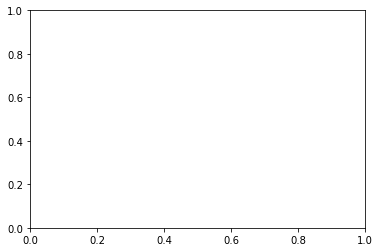

In [7]:
plt.plot(times, rhos)
plt.show()

In [108]:
rhos

array([ 1.00000095,  1.00000095,  1.00000095,  1.00000095,  1.00000095,
        1.00000095,  1.00000095,  1.00000095,  1.00000095,  1.00000095,
        1.00000095,  1.00000095,  1.00000095,  1.00000095,  1.00000095,
        1.00000095,  1.00000095,  1.00000095,  1.00000095,  1.00000095,
        1.00000095,  1.00000095,  1.00000095,  1.00000095,  1.00000095,
        1.00000095,  1.00000095,  1.00000095,  1.00000095,  1.00000095,
        1.00000095,  1.00000095,  1.00000095,  1.00000095,  1.00000095,
        1.00000095,  1.00000095,  1.00000095,  1.00000095,  1.00000095,
        1.00000095,  1.00000095,  1.00000095,  1.00000095,  1.00000095,
        1.00000095,  1.00000095,  1.00000095,  1.00000095,  1.00000095,
        1.00000095,  1.00000095,  1.00000095,  1.00000095,  1.00000095,
        1.00000095,  1.00000095,  1.00000095,  1.00000095,  1.00000095,
        1.00000095,  1.00000095,  1.00000095,  1.00000095,  1.00000095,
        1.00000095,  1.00000095,  1.00000095,  1.00000095,  1.00

In [80]:
times

array([ 0.       ,  0.0140625,  0.028125 ,  0.0421875,  0.0562499,
        0.0703124,  0.0843749,  0.0984374,  0.1125   ,  0.126562 ,
        0.140625 ,  0.154687 ,  0.16875  ,  0.182812 ,  0.196875 ,
        0.210937 ,  0.225    ,  0.239062 ,  0.253125 ,  0.267187 ,
        0.28125  ,  0.295312 ,  0.309375 ,  0.323437 ,  0.3375   ,
        0.351562 ,  0.365625 ,  0.379687 ,  0.39375  ,  0.407812 ,
        0.421875 ,  0.435937 ,  0.45     ,  0.464062 ,  0.478125 ,
        0.492187 ,  0.50625  ,  0.520312 ,  0.534374 ,  0.548437 ,
        0.562499 ,  0.576562 ,  0.590624 ,  0.604687 ,  0.618749 ,
        0.632812 ,  0.646874 ,  0.660937 ,  0.674999 ,  0.689062 ,
        0.703124 ,  0.717187 ,  0.731249 ,  0.745312 ,  0.759374 ,
        0.773437 ,  0.787499 ,  0.801562 ,  0.815624 ,  0.829687 ,
        0.843749 ,  0.857812 ,  0.871874 ,  0.885937 ,  0.899999 ,
        0.914062 ,  0.928124 ,  0.942187 ,  0.956249 ,  0.970312 ,
        0.984374 ,  0.998437 ,  1.0125   ,  1.02656  ,  1.0406